# Análise Exploratória - usuário id88

Analisar o id88 por ser um usuário destaque por ter resolvido boa parte dos bugs e reportado muitos bugs tb. Além disso, ele foi o que possui menor TimeFixBug. O intuito é entender se esse TimeFixBug reduzido é sua competência ou tem alguma relação com outra variável.

## Importações

In [1]:
#Manipulação de Dados
import pandas as pd
import numpy as np
from datetime import datetime

#Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sb
from pandas_profiling import ProfileReport


In [2]:
# Permitir exibição dos plots no Jupyter Notebook
%matplotlib inline

In [3]:
# Exibir todas as colunas no head
pd.set_option('display.max_columns', None)

## Carregamento dos Dados

In [4]:
changelog_file = pd.read_csv("../data/raw/new_changelog_file.csv", sep = ";")
commit_file = pd.read_csv("../data/raw/new_commit_file.csv", sep = ";")
comment_file = pd.read_csv("../data/raw/new_comment_file.csv", sep = ";")
final_list_of_contributors = pd.read_csv("../data/raw/final_list_of_contributors_after.csv", sep = ";")
snapshot_file = pd.read_csv("../data/raw/new_snapshot_file.csv", sep = ";")



## Tratamento e Limpeza

In [5]:
snapshot_file.drop(columns = ["Owner", "Manager", "Category", "Key", "AffectsVersions", "FixVersions", "NoWatchers", "InwardIssueLinks", "OutwardIssueLinks", "HasMergeCommit"], inplace = True)

In [10]:
snapshot_file.NoAuthors = snapshot_file.NoAuthors.astype("int")
snapshot_file.NoCommitters = snapshot_file.NoCommitters.astype("int")

In [9]:
# Criação do TimeFixBug para estimar o tempo de resolução do bug em horas.
snapshot_file["ResolutionDate"] = pd.to_datetime(snapshot_file["ResolutionDate"])
snapshot_file["CreationDate"] = pd.to_datetime(snapshot_file["CreationDate"])
snapshot_file["TimeFixBug"] = ((snapshot_file["ResolutionDate"] - snapshot_file["CreationDate"]).dt.days)*24

## Analise

In [27]:
snapshot_file_ID88_Assignee = snapshot_file.query("Assignee == 'id88'")

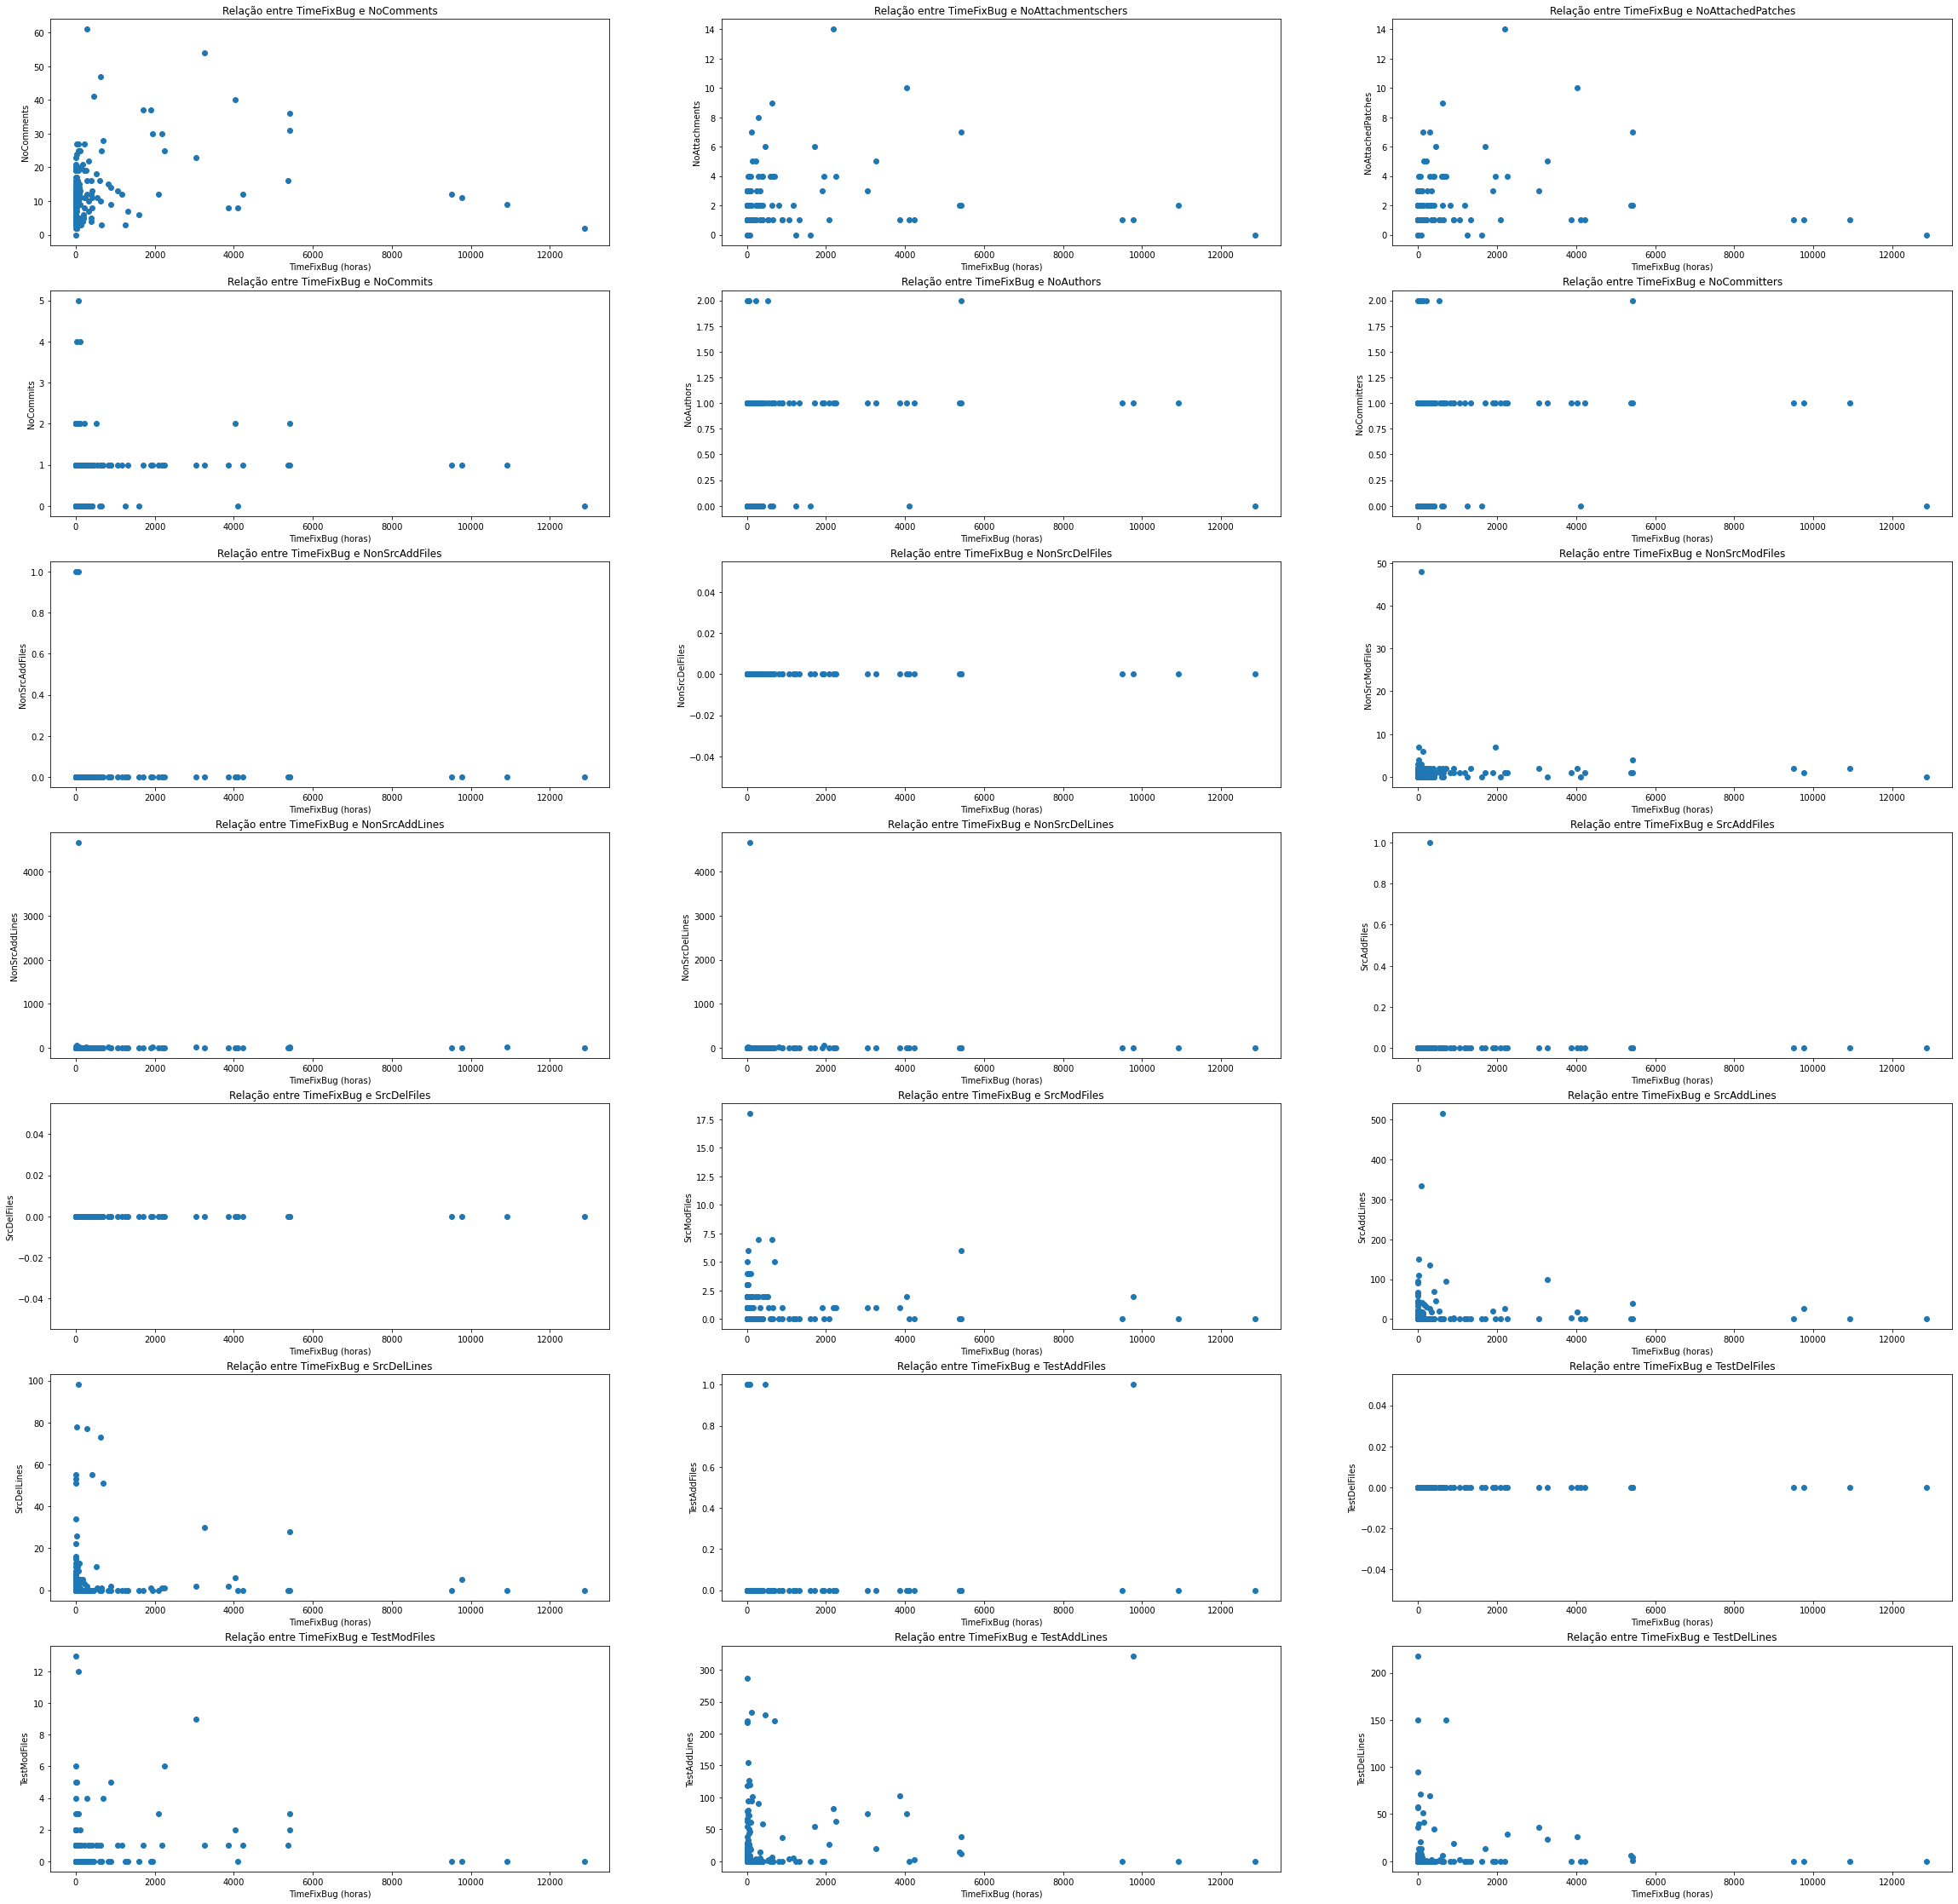

In [29]:
fig, axes = plt.subplots(7, 3, figsize = (40, 40))
axes[0, 0].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NoComments)
axes[0, 0].set_title("Relação entre TimeFixBug e NoComments")
axes[0, 0].set_xlabel("TimeFixBug (horas)")
axes[0, 0].set_ylabel("NoComments")

axes[0, 1].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NoAttachments)
axes[0, 1].set_title("Relação entre TimeFixBug e NoAttachmentschers")
axes[0, 1].set_xlabel("TimeFixBug (horas)")
axes[0, 1].set_ylabel("NoAttachments")

axes[0, 2].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NoAttachedPatches)
axes[0, 2].set_title("Relação entre TimeFixBug e NoAttachedPatches")
axes[0, 2].set_xlabel("TimeFixBug (horas)")
axes[0, 2].set_ylabel("NoAttachedPatches")

axes[1, 0].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NoCommits)
axes[1, 0].set_title("Relação entre TimeFixBug e NoCommits")
axes[1, 0].set_xlabel("TimeFixBug (horas)")
axes[1, 0].set_ylabel("NoCommits")

axes[1, 1].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NoAuthors)
axes[1, 1].set_title("Relação entre TimeFixBug e NoAuthors")
axes[1, 1].set_xlabel("TimeFixBug (horas)")
axes[1, 1].set_ylabel("NoAuthors")

axes[1, 2].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NoCommitters)
axes[1, 2].set_title("Relação entre TimeFixBug e NoCommitters")
axes[1, 2].set_xlabel("TimeFixBug (horas)")
axes[1, 2].set_ylabel("NoCommitters")

axes[2, 0].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NonSrcAddFiles)
axes[2, 0].set_title("Relação entre TimeFixBug e NonSrcAddFiles")
axes[2, 0].set_xlabel("TimeFixBug (horas)")
axes[2, 0].set_ylabel("NonSrcAddFiles")

axes[2, 1].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NonSrcDelFiles)
axes[2, 1].set_title("Relação entre TimeFixBug e NonSrcDelFiles")
axes[2, 1].set_xlabel("TimeFixBug (horas)")
axes[2, 1].set_ylabel("NonSrcDelFiles")

axes[2, 2].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NonSrcModFiles)
axes[2, 2].set_title("Relação entre TimeFixBug e NonSrcModFiles")
axes[2, 2].set_xlabel("TimeFixBug (horas)")
axes[2, 2].set_ylabel("NonSrcModFiles")

axes[3, 0].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NonSrcAddLines)
axes[3, 0].set_title("Relação entre TimeFixBug e NonSrcAddLines")
axes[3, 0].set_xlabel("TimeFixBug (horas)")
axes[3, 0].set_ylabel("NonSrcAddLines")

axes[3, 1].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.NonSrcDelLines)
axes[3, 1].set_title("Relação entre TimeFixBug e NonSrcDelLines")
axes[3, 1].set_xlabel("TimeFixBug (horas)")
axes[3, 1].set_ylabel("NonSrcDelLines")

axes[3, 2].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.SrcAddFiles)
axes[3, 2].set_title("Relação entre TimeFixBug e SrcAddFiles")
axes[3, 2].set_xlabel("TimeFixBug (horas)")
axes[3, 2].set_ylabel("SrcAddFiles")

axes[4, 0].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.SrcDelFiles)
axes[4, 0].set_title("Relação entre TimeFixBug e SrcDelFiles")
axes[4, 0].set_xlabel("TimeFixBug (horas)")
axes[4, 0].set_ylabel("SrcDelFiles")

axes[4, 1].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.SrcModFiles)
axes[4, 1].set_title("Relação entre TimeFixBug e SrcModFiles")
axes[4, 1].set_xlabel("TimeFixBug (horas)")
axes[4, 1].set_ylabel("SrcModFiles")

axes[4, 2].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.SrcAddLines)
axes[4, 2].set_title("Relação entre TimeFixBug e SrcAddLines")
axes[4, 2].set_xlabel("TimeFixBug (horas)")
axes[4, 2].set_ylabel("SrcAddLines")

axes[5, 0].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.SrcDelLines)
axes[5, 0].set_title("Relação entre TimeFixBug e SrcDelLines")
axes[5, 0].set_xlabel("TimeFixBug (horas)")
axes[5, 0].set_ylabel("SrcDelLines")

axes[5, 1].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.TestAddFiles)
axes[5, 1].set_title("Relação entre TimeFixBug e TestAddFiles")
axes[5, 1].set_xlabel("TimeFixBug (horas)")
axes[5, 1].set_ylabel("TestAddFiles")

axes[5, 2].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.TestDelFiles)
axes[5, 2].set_title("Relação entre TimeFixBug e TestDelFiles")
axes[5, 2].set_xlabel("TimeFixBug (horas)")
axes[5, 2].set_ylabel("TestDelFiles")

axes[6, 0].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.TestModFiles)
axes[6, 0].set_title("Relação entre TimeFixBug e TestModFiles")
axes[6, 0].set_xlabel("TimeFixBug (horas)")
axes[6, 0].set_ylabel("TestModFiles")

axes[6, 1].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.TestAddLines)
axes[6, 1].set_title("Relação entre TimeFixBug e TestAddLines")
axes[6, 1].set_xlabel("TimeFixBug (horas)")
axes[6, 1].set_ylabel("TestAddLines")

axes[6, 2].scatter(snapshot_file_ID88_Assignee.TimeFixBug, snapshot_file_ID88_Assignee.TestDelLines)
axes[6, 2].set_title("Relação entre TimeFixBug e TestDelLines")
axes[6, 2].set_xlabel("TimeFixBug (horas)")
axes[6, 2].set_ylabel("TestDelLines")

plt.show()

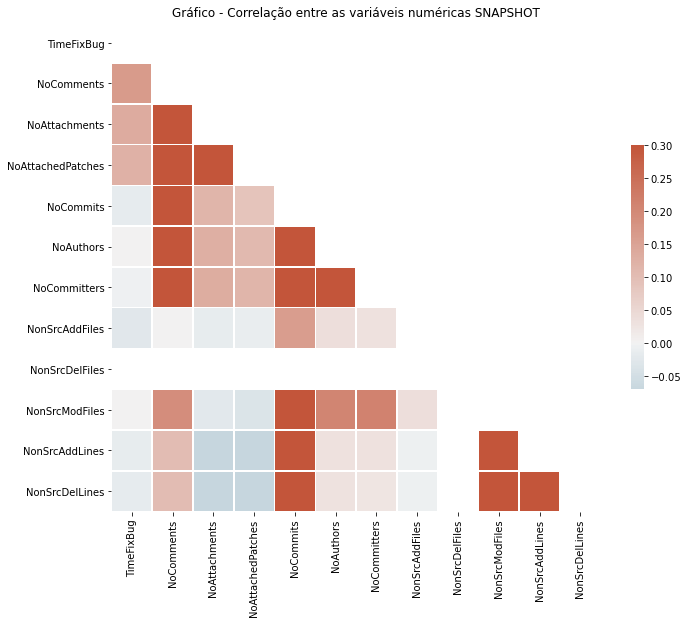

In [28]:
correlacao_snapshot = snapshot_file_ID88_Assignee[["TimeFixBug", "NoComments", "NoAttachments", "NoAttachedPatches", "NoCommits", "NoAuthors", "NoCommitters", 
                            "NonSrcAddFiles", "NonSrcDelFiles", "NonSrcModFiles", "NonSrcAddLines", "NonSrcDelLines"]]
corr = correlacao_snapshot.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Gráfico - Correlação entre as variáveis numéricas SNAPSHOT')
plt.savefig("../reports/figures/corr_snapshot.png")
plt.show()

## Assinaturas do ID88

In [20]:
snapshot_file_ID88_Assignee.describe()

,NoComments,NoAttachments,NoAttachedPatches,NoCommits,NoAuthors,NoCommitters,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines,TimeFixBug
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.0,235.000000,235.000000,235.000000,235.000000,235.0,235.000000,235.000000,235.000000,235.000000,235.0,235.000000,235.000000,235.000000,235.000000
mean,12.280851,1.770213,1.740426,0.914894,0.834043,0.842553,0.008511,0.0,1.259574,23.800000,20.817021,0.004255,0.0,0.778723,12.940426,4.391489,0.029787,0.0,0.842553,20.306383,6.238298,508.595745
std,8.436151,1.619316,1.597495,0.628041,0.436221,0.448999,0.092056,0.0,3.210004,303.906444,303.494949,0.065233,0.0,1.651849,44.975832,13.518266,0.170363,0.0,1.592147,48.418137,22.899694,1633.147698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,24.000000
75%,14.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,4.000000,0.000000,0.000000,0.0,1.000000,8.500000,2.000000,0.000000,0.0,1.000000,12.500000,2.000000,168.000000
max,61.000000,14.000000,14.000000,5.000000,2.000000,2.000000,1.000000,0.0,48.000000,4662.000000,4653.000000,1.000000,0.0,18.000000,515.000000,98.000000,1.000000,0.0,13.000000,322.000000,218.000000,12864.000000


- A maioria dos seus FixBug envolveram apenas um commit. Alguns casos com 2 commits.
- Ele tanto trabalhou com modificações de arquivos de código-fonte como de teste.
- Até 50% dos seus TimeFixBug foi de até 24h (1 dia).


In [13]:
snapshot_file_ID88_Assignee.Status.value_counts()

Closed      149
Resolved     86
Name: Status, dtype: int64

In [14]:
snapshot_file_ID88_Assignee.Priority.value_counts()

Major       150
Minor        41
Trivial      29
Blocker      11
Critical      4
Name: Priority, dtype: int64

In [18]:
snapshot_file_ID88_Assignee.Project.value_counts()

HADOOP       99
HDFS         97
YARN         22
MAPREDUCE    17
Name: Project, dtype: int64

- A maioria dos FixBug envolveram a prioridxade Major e Minor. Poucos foram Trivial, Blocker e Critical. 
- Ele resolveu bugs em praticamente todos os projetos, mas tendo maior presença em HADOOP, HDFS.

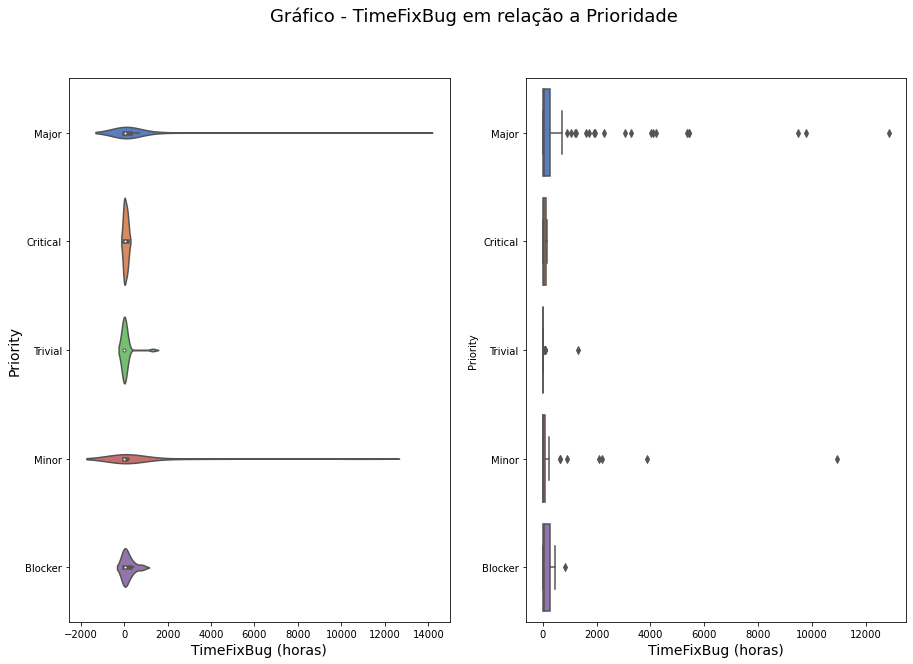

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))

sb.violinplot(x = 'TimeFixBug', y = 'Priority',
                data = snapshot_file_ID88_Assignee, 
                palette = "muted", 
                ax = axes[0])
axes[0].set_xlabel('TimeFixBug (horas)', fontsize = 14)
axes[0].set_ylabel('Priority', fontsize = 14) 

sb.boxplot(x = 'TimeFixBug', y = 'Priority',
                data = snapshot_file_ID88_Assignee, 
                palette = "muted",
                ax = axes[1])
axes[1].set_xlabel('TimeFixBug (horas)', fontsize = 14)

fig.suptitle('Gráfico - TimeFixBug em relação a Prioridade', fontsize = 18)
plt.show()

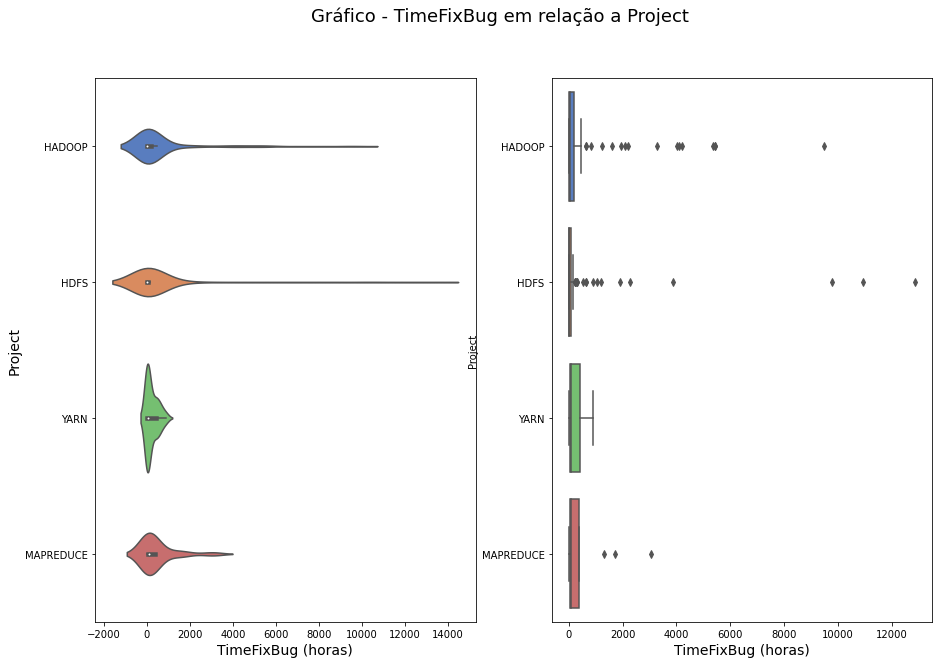

In [17]:
fig, axes = plt.subplots(1, 2, figsize = (15, 10))

sb.violinplot(x = 'TimeFixBug', y = 'Project',
                data = snapshot_file_ID88_Assignee, 
                palette = "muted",
                ax = axes[0])
axes[0].set_xlabel('TimeFixBug (horas)', fontsize = 14)
axes[0].set_ylabel('Project', fontsize = 14) 

sb.boxplot(x = 'TimeFixBug', y = 'Project',
                data = snapshot_file_ID88_Assignee, 
                palette = "muted",
                ax = axes[1])
axes[1].set_xlabel('TimeFixBug (horas)', fontsize = 14)

fig.suptitle('Gráfico - TimeFixBug em relação a Project', fontsize = 18)
plt.show()

## Reportes do ID88

In [22]:
snapshot_file_ID88_Reporter = snapshot_file.query("Reporter == 'id88'")

In [23]:
snapshot_file_ID88_Reporter.describe()

,NoComments,NoAttachments,NoAttachedPatches,NoCommits,NoAuthors,NoCommitters,NonSrcAddFiles,NonSrcDelFiles,NonSrcModFiles,NonSrcAddLines,NonSrcDelLines,SrcAddFiles,SrcDelFiles,SrcModFiles,SrcAddLines,SrcDelLines,TestAddFiles,TestDelFiles,TestModFiles,TestAddLines,TestDelLines,TimeFixBug
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.0,251.000000,251.000000,251.000000,251.0,251.0,251.000000,251.000000,251.000000,251.000000,251.0,251.000000,251.000000,251.000000,251.000000
mean,12.820717,1.884462,1.860558,0.880478,0.832669,0.836653,0.007968,0.0,1.091633,4.294821,1.191235,0.0,0.0,0.772908,12.334661,4.462151,0.015936,0.0,0.868526,15.745020,5.235060,574.661355
std,9.423573,1.584487,1.562203,0.515420,0.424133,0.430362,0.089086,0.0,1.827449,10.586441,5.655730,0.0,0.0,1.666200,43.476885,13.210964,0.125479,0.0,1.748898,36.179535,19.771407,2066.894279
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,3.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,24.000000
75%,15.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,3.500000,0.000000,0.0,0.0,1.000000,8.000000,2.000000,0.000000,0.0,1.000000,12.000000,2.000000,192.000000
max,97.000000,13.000000,12.000000,4.000000,2.000000,2.000000,1.000000,0.0,27.000000,150.000000,62.000000,0.0,0.0,18.000000,515.000000,98.000000,1.000000,0.0,13.000000,287.000000,218.000000,25008.000000


In [24]:
snapshot_file_ID88_Reporter.Status.value_counts()

Closed      148
Resolved    103
Name: Status, dtype: int64

In [25]:
snapshot_file_ID88_Reporter.Priority.value_counts()

Major       165
Minor        40
Trivial      33
Blocker       9
Critical      4
Name: Priority, dtype: int64

In [26]:
snapshot_file_ID88_Reporter.Project.value_counts()

HDFS         104
HADOOP       102
YARN          24
MAPREDUCE     21
Name: Project, dtype: int64

- Maioria dos projetos que foram reportados envolveu HDFS e Hadoop;
- Muitos bugs reportados por ele envolveu prioridade Major e Minor. 